In [3]:
import pandas as pd
#from Sector_Exposure import Rate_Exposures
import fredapi as fa
from datetime import date
import Scripts.Useful_Functions as u
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from Exposure_Report import Exposure


fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

# 2006
# sectors_and_rates

cpi = fred.get_series("CPALTT01USM657N", observation_start="2010-01-04")



#sectors_df = pd.read_csv("2006.csv", index_col = "Date")
sectors_df = pd.read_csv("sectors_and_rates.csv", index_col = "Date")

#sectors_df['inflation'] = fred.get_series('T10YIE', observation_start = '2006-01-04', end = date.today())
#sectors_df['oil'] = fred.get_series('DCOILBRENTEU', observation_start = '2006-01-04', end = date.today())
#sectors_df['uncertainty'] = fred.get_series('USEPUINDXD', observation_start = '2006-01-04', end = date.today())
#sectors_df['gas'] = fred.get_series('GASDESW', observation_start = '2006-01-04', end = date.today())
#sectors_df['gas'] = sectors_df['gas'].ffill()
#sectors_df = sectors_df.dropna()
#sectors_df[int(len(sectors_df)*.7):]



factor_df = pd.read_csv("factors_and_rates.csv", index_col = "Date")
factor_df['sp_500'] = sectors_df['sp_500']


sc = StandardScaler()



In [13]:



log_rets = pd.Series(np.log(sectors_df['sp_500']/sectors_df['sp_500'].shift()), index = sectors_df.index)
                    

log_rets.rolling(30).std()*252**.5



Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2022-06-13    0.315002
2022-06-14    0.313872
2022-06-15    0.317342
2022-06-16    0.313111
2022-06-17    0.299590
Name: sp_500, Length: 2986, dtype: float64

In [3]:

sectors_df.corr()


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,SP-500,Real Yield,Yield Curve,inflation,oil,uncertainty
Materials,1.000000,0.978482,0.959141,0.929237,0.951469,0.819190,0.944186,0.901431,0.931573,0.923210,-0.068463,0.937857,0.893487,0.976711,-0.633651,-0.413661,0.201588,-0.123988,0.027867
Industrials,0.978482,1.000000,0.974153,0.961724,0.977507,0.831526,0.935828,0.871815,0.962282,0.941400,-0.127669,0.919477,0.956266,0.985568,-0.613244,-0.498901,0.082749,-0.248690,0.015361
Consumer Discretionary,0.959141,0.974153,1.000000,0.959427,0.985885,0.772686,0.979634,0.871428,0.943554,0.907944,-0.276276,0.961208,0.921311,0.993383,-0.676919,-0.451306,0.023325,-0.285612,0.134070
Consumer Staples,0.929237,0.961724,0.959427,1.000000,0.981498,0.692131,0.904451,0.812664,0.948848,0.908574,-0.144084,0.868120,0.938940,0.954337,-0.723576,-0.428354,-0.062801,-0.301275,0.083901
Health Care,0.951469,0.977507,0.985885,0.981498,1.000000,0.762793,0.951386,0.839612,0.958750,0.915515,-0.224316,0.924895,0.944162,0.985265,-0.658204,-0.471530,-0.036728,-0.329834,0.107898
Financials,0.819190,0.831526,0.772686,0.692131,0.762793,1.000000,0.767831,0.821593,0.816194,0.872236,-0.132081,0.790449,0.744990,0.822047,-0.195324,-0.728145,0.282736,-0.261710,-0.123868
Information Technology,0.944186,0.935828,0.979634,0.904451,0.951386,0.767831,1.000000,0.871371,0.912212,0.865329,-0.343334,0.993663,0.860825,0.979570,-0.646049,-0.417158,0.069175,-0.233724,0.194869
Telecommunication Services,0.901431,0.871815,0.871428,0.812664,0.839612,0.821593,0.871371,1.000000,0.843619,0.894940,-0.112191,0.879730,0.718860,0.890985,-0.595329,-0.442762,0.246404,-0.132574,0.014799
Utilities,0.931573,0.962282,0.943554,0.948848,0.958750,0.816194,0.912212,0.843619,1.000000,0.947145,-0.188821,0.887137,0.939658,0.958940,-0.595943,-0.601584,-0.006792,-0.306609,0.076269
Real Estate,0.923210,0.941400,0.907944,0.908574,0.915515,0.872236,0.865329,0.894940,0.947145,1.000000,-0.070367,0.850201,0.872538,0.930607,-0.574404,-0.630621,0.156666,-0.226724,-0.035908


In [24]:

#sp_500 = pd.Series(sc.fit_transform(np.array(sectors_df['SP-500']).reshape(-1,1)).ravel(), index = sectors_df['SP-500'].index)

#sectors_df['SP-500'].pct_change().plot(figsize = (15,10))

# [-1000:]
#sectors_df['SP-500'].plot(figsize = (15,10))

sector_exposure = Exposure(sectors_df, 252, 252, ['Real Yield', 'Yield Curve', "uncertainty"])
factor_exposure = Exposure(factor_df, 252, 252, ['Real Yield', 'Yield Curve', "SP-500"])



In [34]:


#u.barplot_1d(sector_exposure.mean_returns['Real Yield'][u.cs])


factor_exposure.mean_return_all_combos.loc[(2)]




,,Value,Quality,Size,Default
4.0,1.0,0.113217,0.123237,0.113967,-0.025735
6.0,1.0,0.079980,0.106662,0.095520,-0.035108
2.0,2.0,0.182604,0.204049,0.166667,0.009351
3.0,3.0,0.166440,0.187011,0.150582,0.011520
2.0,3.0,0.183680,0.193104,0.160991,0.009891
1.0,2.0,0.185259,0.196076,0.170551,0.012790
2.0,1.0,0.202868,0.200173,0.167131,0.007870
1.0,1.0,0.208577,0.213748,0.173072,0.009284
3.0,2.0,0.156692,0.180008,0.128142,-0.011167
1.0,3.0,0.152050,0.178332,0.128329,-0.013888


In [183]:

# (sectors_df.index >= "2017-01-04") & 
normal = sectors_df.loc[ (sectors_df.index < "2007-11-04")]
crash_of_08 = sectors_df.loc[(sectors_df.index >= "2007-11-04") & (sectors_df.index < "2013-01-04")]
normal2 = sectors_df.loc[(sectors_df.index >= "2013-01-04") & (sectors_df.index < "2018-01-04")]
crash_of_19 = sectors_df.loc[(sectors_df.index >= "2018-01-04") & (sectors_df.index < "2019-08-04")]
normal3 = sectors_df.loc[(sectors_df.index >= "2019-08-04") & (sectors_df.index < "2020-01-04")]
covid = sectors_df.loc[(sectors_df.index >= "2020-01-04") & (sectors_df.index < "2021-08-04")]
normal4 = sectors_df.loc[(sectors_df.index >= "2020-10-04") & (sectors_df.index < "2021-09-04")]
crash_of_22 = sectors_df.loc[(sectors_df.index >= "2021-11-04")]



In [184]:


def corr_diffs(rate, sec):

    crashes = {'08' : crash_of_08, '19' : crash_of_19, 'covid' : covid, '22' : crash_of_22}
    # [:-4]
    mean_corr_per_crash = [np.mean(crashes[c].corr()[rate][sec]) for c in crashes]
    crash_means = np.mean(mean_corr_per_crash)

    normal_periods = {'1' : normal, '2' : normal2, '3' : normal3, '4' : normal4}
    # [:-4]
    mean_corr_per_normal = [np.mean(normal_periods[n].corr()[rate][sec]) for n in normal_periods]
    normal_means = np.mean(mean_corr_per_normal)

    return {"distressed" : mean_corr_per_crash, "normal" : mean_corr_per_normal}, (crash_means, normal_means)


''' Divergent Ones '''
#corr_diffs(u.ry, u.cd)
#corr_diffs(u.ry, u.ind)
#corr_diffs(u.ry, u.fin)


corr_diffs("oil", u.en)


({'distressed': [0.8953579598810449,
   0.7729199634644753,
   0.8356172811839659,
   0.9204770966391205],
  'normal': [0.66052381390466,
   0.8263533613476112,
   0.7520097900852677,
   0.95066507365406]},
 (0.8560930752921516, 0.7973880097478997))

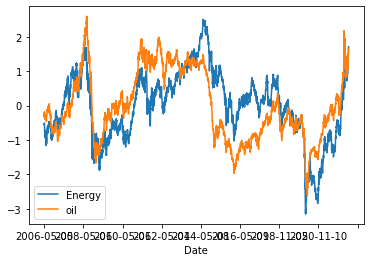

In [185]:

scaled_sectors_df = pd.DataFrame(sc.fit_transform(sectors_df), columns=sectors_df.columns, index = sectors_df.index)
plt.figure()
scaled_sectors_df["Energy"].plot()
scaled_sectors_df['oil'].plot()
plt.legend()

In [291]:

sectors_df = sectors_df.loc[ sectors_df.index >= "2010-01-04"]

ok = Rate_Exposures(sectors_df, 252, 30, ['Real Yield', 'Yield Curve', "inflation", "oil"], "SP-500")

rets = ok.forward_returns_daily.dropna()

rets = rets.drop(columns = ['inflation_scores', "Real Yield_scores", "Yield Curve_scores"])

In [292]:

mean_rets = {}

for inf in range(-5,6):
    
    # ['Real Yield_scores']
    # inflation_scores
    mean_rets[inf] = rets.iloc[:,:-1].loc[ rets.oil_scores == inf ].mean()
    
    #mean_rets = mean_rets.append(rets.iloc[:,:-3].loc[ rets.inflation_scores == inf ].mean())
    
mean_rets = pd.DataFrame(mean_rets).T
mean_rets

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,-0.006067,-0.002099,0.013731,0.010080,0.017387,-0.012656,0.007854,-0.011688,0.004619,0.013736,-0.055915,0.013819,0.007301
-4,-0.008723,-0.013672,0.017699,0.009026,0.024468,-0.009886,0.012205,-0.007213,-0.012407,0.000211,-0.074647,0.013050,-0.013610
-3,-0.014287,-0.021495,0.010582,0.020932,0.032821,-0.014582,0.015406,-0.009869,0.005600,-0.004080,-0.094581,0.007203,-0.031335
-2,-0.006584,-0.003931,0.009875,0.004586,-0.003306,-0.013297,0.013353,-0.002220,-0.010631,-0.023664,-0.013178,0.008041,-0.009739
-1,-0.011856,0.000018,0.002768,0.003647,0.003649,-0.000431,0.000789,-0.002107,0.009847,0.000827,-0.013679,-0.009282,0.004284
0,-0.005937,-0.003307,0.002362,-0.008190,0.009275,0.004742,0.004030,-0.016745,-0.008438,-0.016318,-0.009648,0.005372,0.003441
1,0.003005,0.001965,0.002138,-0.013380,0.003889,0.012377,0.003332,-0.017246,-0.019225,-0.016903,-0.007306,0.022216,0.008771
2,0.008869,0.012523,0.005656,-0.014349,0.003580,0.016809,-0.001194,-0.016887,-0.019262,-0.013780,-0.008870,0.007545,0.023527
3,-0.000230,-0.003453,0.007914,0.006230,0.022628,-0.014198,0.002157,0.004483,0.001261,0.010511,-0.015997,0.002448,-0.002804
4,-0.001729,-0.006600,0.004471,0.021166,0.030448,-0.032233,-0.001275,0.019030,0.012592,0.015431,-0.011495,-0.005725,-0.011013


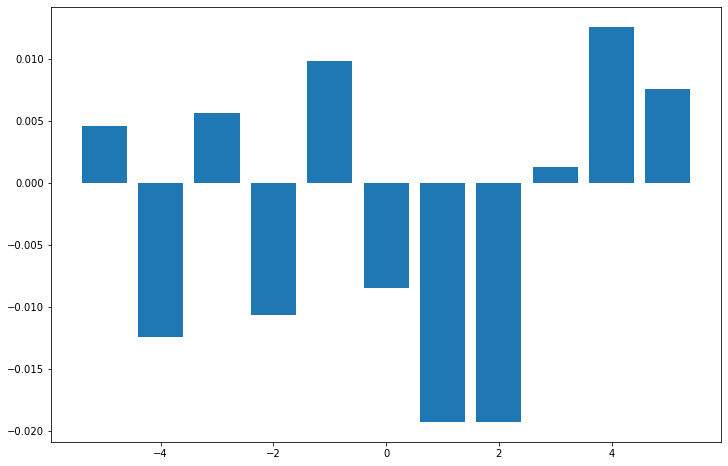

In [293]:


u.barplot_1d(mean_rets[u.ut])



In [252]:

mean_rets['scores'] = mean_rets.index
mean_rets.corr()

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,scores
Materials,1.000000,0.413392,-0.318100,-0.799555,-0.761519,0.599646,0.539147,-0.849682,-0.705121,-0.383928,0.327312,0.749830,0.316091,-0.085128
Industrials,0.413392,1.000000,-0.265292,-0.487875,-0.599577,0.737816,-0.295596,-0.523348,-0.090775,-0.107151,0.441975,0.121556,0.875928,0.001250
Consumer Discretionary,-0.318100,-0.265292,1.000000,0.206790,0.548143,-0.404562,-0.207896,0.266619,0.408435,0.029213,-0.445155,-0.329328,0.078499,-0.260368
Consumer Staples,-0.799555,-0.487875,0.206790,1.000000,0.846295,-0.837619,-0.406615,0.813995,0.637031,0.291835,-0.505112,-0.786146,-0.506776,0.210304
Health Care,-0.761519,-0.599577,0.548143,0.846295,1.000000,-0.855846,-0.368920,0.698055,0.535589,0.119935,-0.598681,-0.687454,-0.532043,0.197150
Financials,0.599646,0.737816,-0.404562,-0.837619,-0.855846,1.000000,0.068035,-0.751332,-0.374815,-0.021460,0.569280,0.477211,0.723123,-0.215092
Information Technology,0.539147,-0.295596,-0.207896,-0.406615,-0.368920,0.068035,1.000000,-0.455551,-0.508581,-0.191515,-0.272809,0.714124,-0.290854,-0.476215
Telecommunication Services,-0.849682,-0.523348,0.266619,0.813995,0.698055,-0.751332,-0.455551,1.000000,0.492481,0.154918,-0.221754,-0.702423,-0.494980,0.306073
Utilities,-0.705121,-0.090775,0.408435,0.637031,0.535589,-0.374815,-0.508581,0.492481,1.000000,0.774267,-0.398523,-0.619172,0.127024,-0.245640
Real Estate,-0.383928,-0.107151,0.029213,0.291835,0.119935,-0.021460,-0.191515,0.154918,0.774267,1.000000,-0.143436,-0.170283,0.088231,-0.361184


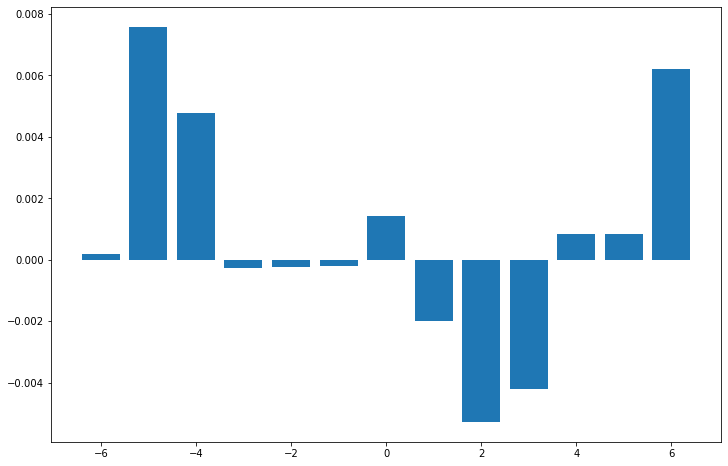

In [253]:


bruh = ok.yc_mean_returns.drop(columns = ['inflation_scores']).copy()

bruh['scores'] = bruh.index

#bruh.corr()['scores']

u.barplot_1d(bruh[u.ut])

<AxesSubplot:>

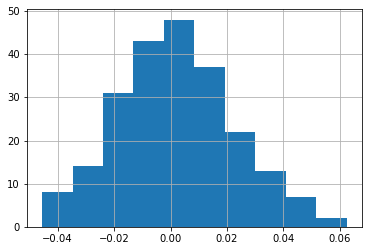

In [269]:


cool = ok.ry_mean_returns.copy()

cool['scores'] = cool.index

#cool.corr()['scores'].plot()
#bruh.corr()['scores'].plot()
#mean_rets.corr()['scores'].plot()

#mos_def = pd.DataFrame([cool.corr()['scores'], bruh.corr()['scores'], mean_rets.corr()['scores']]).drop(columns = ['inflation_scores', 'scores']).T
#mos_def.columns = ["ry", "yc", "inflation"]
#mos_def.corr()


#u.barplot_1d(cool[u.ut])
ok.ry_total_returns[2][u.ut].hist()




<AxesSubplot:>

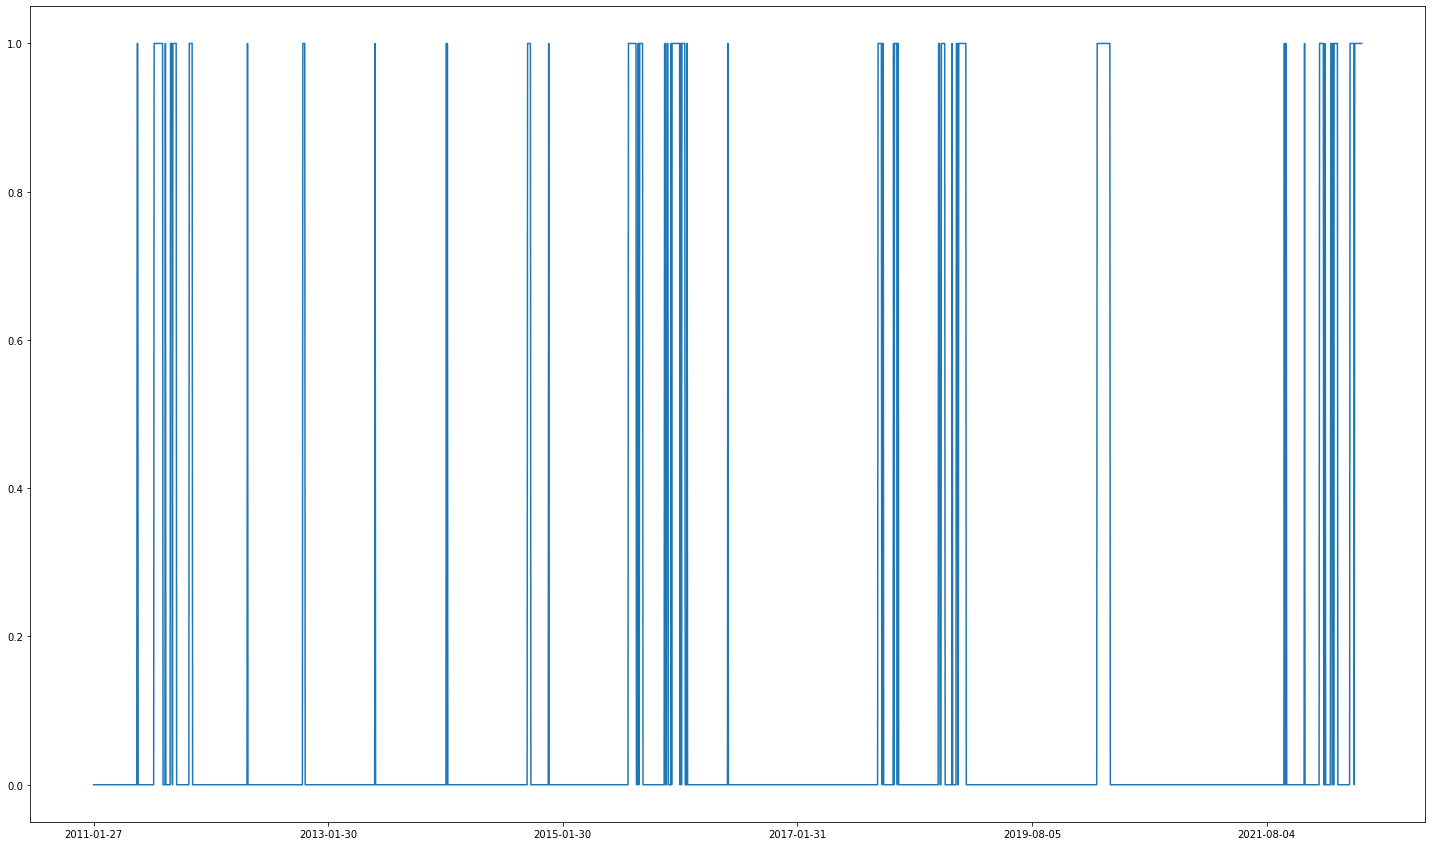

In [334]:



sp_scores = ok.get_scores(252, 'SP-500')


sp_distressed = (sp_scores <= -2).astype(int)

consider_sp500 = rets.drop(columns = ['oil_scores'])
consider_sp500['sp_scores'] = sp_scores
consider_sp500['sp_distressed'] = sp_distressed


sp_distressed.plot(figsize=(25,15))


In [331]:

mark_distressed_periods = []

for num, s in enumerate(sp_distressed):
    
    if s and not sp_distressed[num-1]:
        i = 1
        while num+i < len(sp_distressed) and sp_distressed[num+i]:
            
            i += 1
        
        mark_distressed_periods.append(i)
        
    else:
        mark_distressed_periods.append(0)


In [333]:

mark_distressed_periods = pd.Series(mark_distressed_periods, index = sp_scores.index)

#for num, s in enumerate(mark_distressed_periods):
    
    #if s > 5:
        #print('ok')


mark_distressed_periods.iloc[np.where(mark_distressed_periods > 5)[0]].index



Index(['2011-08-04', '2015-08-21', '2016-01-07', '2016-02-05', '2018-12-17',
       '2020-03-05', '2022-01-20', '2022-05-05', '2022-05-18'],
      dtype='object')

In [300]:

mean_rets_sp = {}

for inf in range(-10,6):
    mean_rets_sp[inf] = consider_sp500.iloc[:,:-2].loc[ consider_sp500.sp_scores == inf ].mean()

mean_rets = pd.DataFrame(mean_rets).T
mean_rets


,-5,-4,-3,-2,-1,0,1,2,3,4,5
Materials,-0.006067,-0.008723,-0.014287,-0.006584,-0.011856,-0.005937,0.003005,0.008869,-0.000230,-0.001729,0.012873
Industrials,-0.002099,-0.013672,-0.021495,-0.003931,0.000018,-0.003307,0.001965,0.012523,-0.003453,-0.006600,0.008011
Consumer Discretionary,0.013731,0.017699,0.010582,0.009875,0.002768,0.002362,0.002138,0.005656,0.007914,0.004471,0.005913
Consumer Staples,0.010080,0.009026,0.020932,0.004586,0.003647,-0.008190,-0.013380,-0.014349,0.006230,0.021166,0.033449
Health Care,0.017387,0.024468,0.032821,-0.003306,0.003649,0.009275,0.003889,0.003580,0.022628,0.030448,0.035735
Financials,-0.012656,-0.009886,-0.014582,-0.013297,-0.000431,0.004742,0.012377,0.016809,-0.014198,-0.032233,-0.029665
Information Technology,0.007854,0.012205,0.015406,0.013353,0.000789,0.004030,0.003332,-0.001194,0.002157,-0.001275,-0.023998
Telecommunication Services,-0.011688,-0.007213,-0.009869,-0.002220,-0.002107,-0.016745,-0.017246,-0.016887,0.004483,0.019030,0.042355
Utilities,0.004619,-0.012407,0.005600,-0.010631,0.009847,-0.008438,-0.019225,-0.019262,0.001261,0.012592,0.007561
Real Estate,0.013736,0.000211,-0.004080,-0.023664,0.000827,-0.016318,-0.016903,-0.013780,0.010511,0.015431,0.005598
